In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpg_data = pd.read_csv("auto-mpg.csv")
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Auto MPG Dataset: Column Explanations

**mpg**
Miles per gallon (MPG), a measure of fuel efficiency for the car. Higher values indicate better fuel economy.

**cylinders**
The number of cylinders in the engine, typically 4, 6, or 8. More cylinders generally indicate a more powerful engine.

**displacement**
Engine displacement in cubic inches. It refers to the total volume of air/fuel mixture an engine can draw in during one cycle.

**horsepower**
The engine’s power output, measured in horsepower. Higher values indicate more powerful engines.

**weight**
The vehicle’s weight in pounds. Heavier vehicles generally have lower fuel efficiency.

**acceleration**
The time it takes for the car to accelerate from 0 to 60 mph, measured in seconds. Lower values indicate quicker acceleration.

**model year**
The year the car model was released. Ranges from 1970 to 1982 in the dataset.

**origin**
The region where the car was manufactured. 1 = USA, 2 = Europe, 3 = Japan.

**car name**
The name of the car model.


In [3]:
mpg_data.shape

(398, 9)

In [4]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
mpg_data["car name"].nunique()

305

In [6]:
mpg_data.drop(["car name"], axis = 1, inplace=True)

In [7]:
mpg_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [8]:
mpg_data["origin"].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [9]:
mpg_data["origin"] = mpg_data["origin"].map({1: "USA", 
                                             2: "Europe", 
                                             3 : "Japan" })

In [10]:
mpg_data["origin"].value_counts()

origin
USA       249
Japan      79
Europe     70
Name: count, dtype: int64

In [11]:
mpg_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

### 1. What is the distribution of MPG in the dataset?


Text(0, 0.5, 'Count')

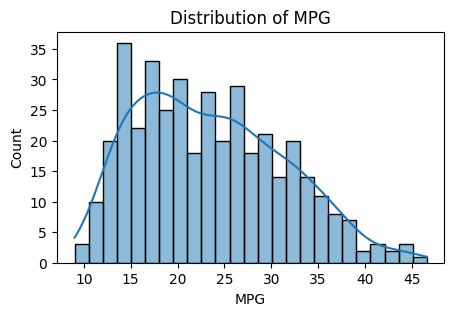

In [12]:
plt.figure(figsize=(5,3))
sns.histplot(data=mpg_data, x='mpg', bins=25, kde=True)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Count')

### 2. How many cars are from each origin (USA, Europe, Japan)?


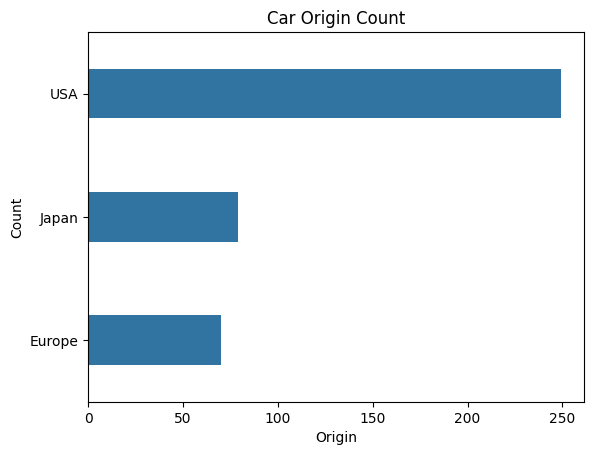

In [13]:
sns.countplot(data=mpg_data, y='origin', width = 0.4)
plt.title('Car Origin Count')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()

### 3. What is proportion of  cars are from each origin (USA, Europe, Japan)?

In [14]:
car_count = mpg_data["origin"].value_counts()
car_count

origin
USA       249
Japan      79
Europe     70
Name: count, dtype: int64

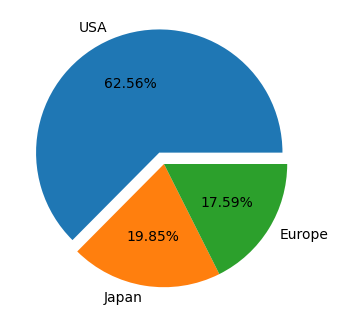

In [15]:
plt.figure(figsize=(5,4))
plt.pie(x = car_count,
        labels = car_count.index,
        autopct="%1.2f%%",
        explode=[0.1,0,0]);

In [16]:
cylinder_count = mpg_data["cylinders"].value_counts()
cylinder_count

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

### 3. What percentage of cars belong to each cylinder category?


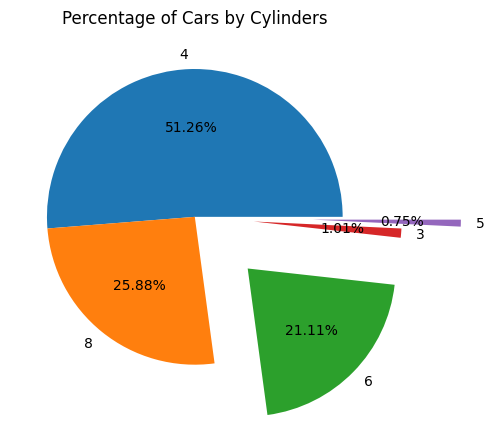

In [17]:
plt.pie(cylinder_count,
        labels = cylinder_count.index,
        autopct="%1.2f%%",
        explode=[0,0,0.5,0.4,0.8])
plt.title('Percentage of Cars by Cylinders')
plt.ylabel('')
plt.show()

In [18]:
try :
    mpg_data["horsepower"].astype("int64")
except Exception as e:
    print(e)
    

invalid literal for int() with base 10: '?'


In [19]:
hp_is_digit = pd.DataFrame(mpg_data["horsepower"].str.isdigit())
mpg_data[hp_is_digit["horsepower"]==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,USA
126,21.0,6,200.0,?,2875,17.0,74,USA
330,40.9,4,85.0,?,1835,17.3,80,Europe
336,23.6,4,140.0,?,2905,14.3,80,USA
354,34.5,4,100.0,?,2320,15.8,81,Europe
374,23.0,4,151.0,?,3035,20.5,82,USA


In [20]:
mpg_data["horsepower"] = mpg_data["horsepower"].replace("?", np.nan)

In [21]:
mpg_data[hp_is_digit["horsepower"]==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,USA
126,21.0,6,200.0,NaN,2875,17.0,74,USA
330,40.9,4,85.0,NaN,1835,17.3,80,Europe
336,23.6,4,140.0,NaN,2905,14.3,80,USA
354,34.5,4,100.0,NaN,2320,15.8,81,Europe
374,23.0,4,151.0,NaN,3035,20.5,82,USA


In [22]:
mpg_data["horsepower"].dtype

dtype('O')

In [23]:
mpg_data["horsepower"] = mpg_data["horsepower"].astype("float64")

In [24]:
mpg_data["horsepower"].dtype

dtype('float64')

In [25]:
mpg_data["horsepower"].median()

93.5

In [26]:
mpg_data["horsepower"] = mpg_data["horsepower"].fillna(mpg_data["horsepower"].median())

In [27]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,USA
1,15.0,8,350.0,165.0,3693,11.5,70,USA
2,18.0,8,318.0,150.0,3436,11.0,70,USA
3,16.0,8,304.0,150.0,3433,12.0,70,USA
4,17.0,8,302.0,140.0,3449,10.5,70,USA


### 4. What is the relationship between horsepower and weight of cars?


In [78]:
mpg_data[["horsepower","weight"]].corr()

,horsepower,weight
horsepower,1.000000,0.862442
weight,0.862442,1.000000


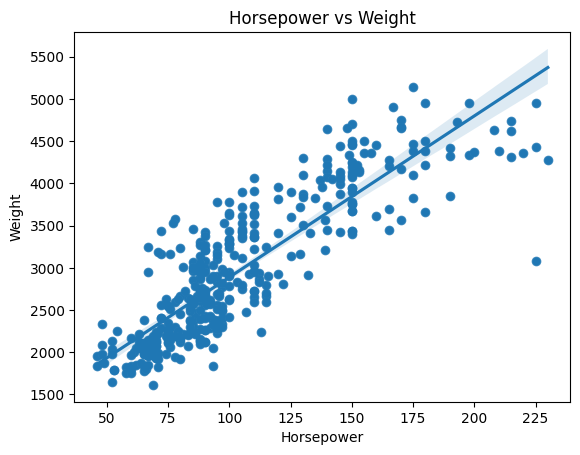

In [77]:
sns.scatterplot(data=mpg_data, x='horsepower', y='weight')
sns.regplot(data=mpg_data, x='horsepower', y='weight')
plt.title('Horsepower vs Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.show()

### 5. How does MPG vary across different numbers of cylinders?


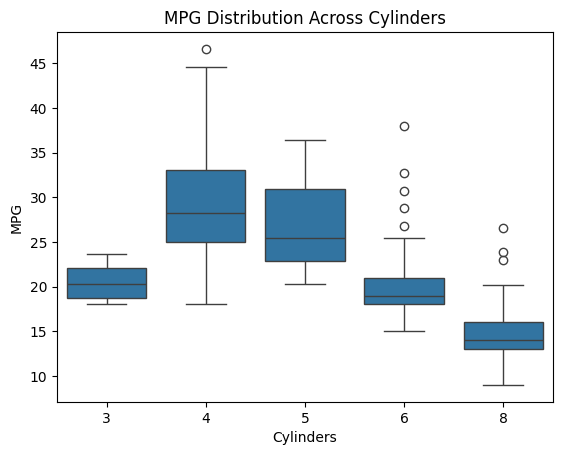

In [68]:
sns.boxplot(data=mpg_data, x='cylinders', y='mpg')
plt.title('MPG Distribution Across Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.show()

**Insight** : 4,5 - Cylinder car are more fuel efficient(higher mpg) than 8- cylinder cars

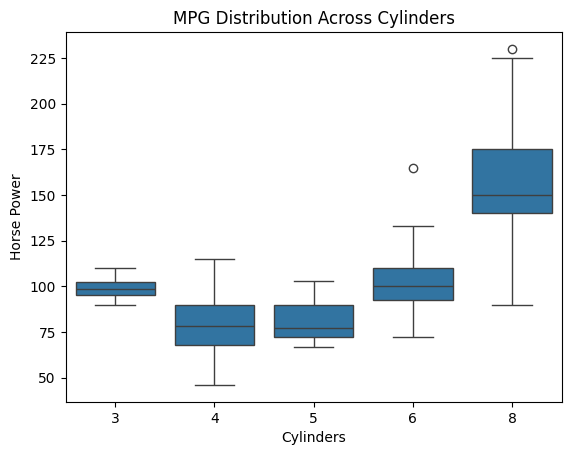

In [81]:
sns.boxplot(data=mpg_data, x='cylinders', y='horsepower')
plt.title('MPG Distribution Across Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Horse Power')
plt.show()

**Insight** : 8-cylinder cars have more powerful engines (high horse power) than 4-5 cylinder cars

### 6. What are the relationships among horsepower, and acceleration ?


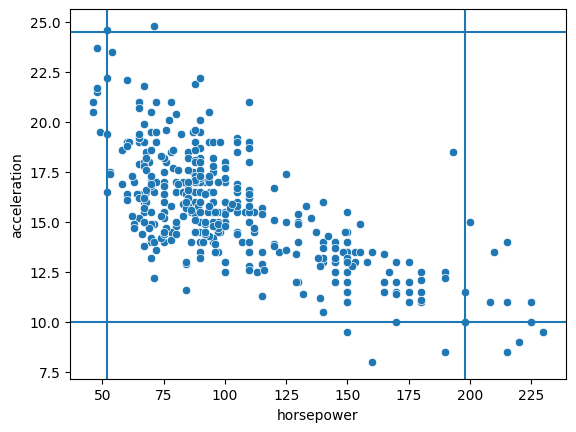

In [79]:
sns.scatterplot(x = mpg_data["horsepower"], y =mpg_data["acceleration"])
plt.axvline(198, )
plt.axhline(10)
plt.axvline(52)
plt.axhline(24.5)

**Insight** : High horse power cars have less time to accelerate (0-60mph) compared to low horse power cars

### 7. How does horsepower vary by origin?


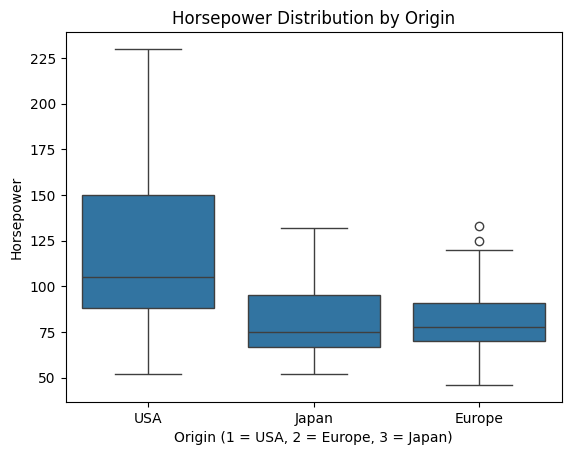

In [86]:
sns.boxplot(data=mpg_data, x='origin', y='horsepower')
plt.title('Horsepower Distribution by Origin')
plt.xlabel('Origin (1 = USA, 2 = Europe, 3 = Japan)')
plt.ylabel('Horsepower')
plt.show()

**Insight** : USA tend to manufacture high horse power cars where as Japan and Europe manufacture low horse power cars

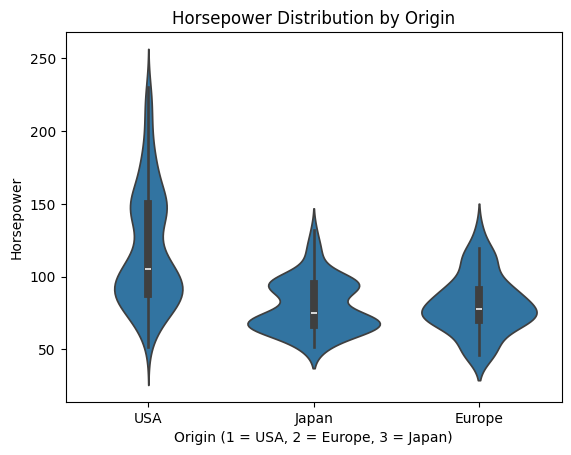

In [85]:
sns.violinplot(data=mpg_data, x='origin', y='horsepower')
plt.title('Horsepower Distribution by Origin')
plt.xlabel('Origin (1 = USA, 2 = Europe, 3 = Japan)')
plt.ylabel('Horsepower')
plt.show()

In [88]:
mpg_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

### 8. What is the trend of MPG across different model years?


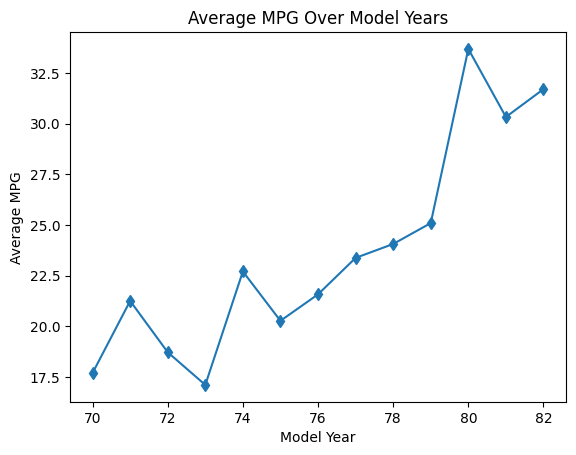

In [90]:
mpg_data.groupby('model year')['mpg'].mean().plot(kind='line', marker = "d")
plt.title('Average MPG Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.show()

**Insight** : Average MPG (mileage/fuel economy) is increasing over years

### 9. What is the distribution of displacement in the dataset?


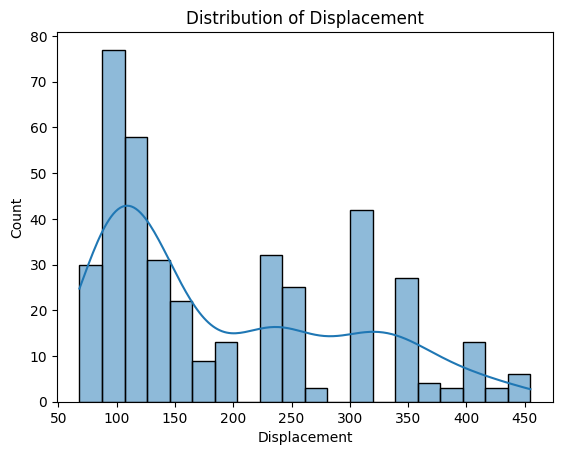

In [81]:
sns.histplot(data=mpg_data, x='displacement',kde=True, bins =20)
plt.title('Distribution of Displacement')
plt.xlabel('Displacement')
plt.show()

**Insight** : Most cars have engine displacment <150 cubic inches

### How does the weight affect the mpg

<Axes: xlabel='weight', ylabel='mpg'>

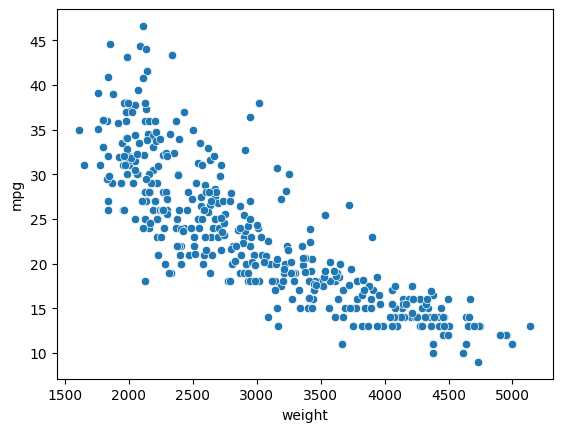

In [93]:
sns.scatterplot(x = mpg_data["weight"], y = mpg_data["mpg"])

**Insight** : Heavier cars (high weight) tend to have less mileage (mpg)

### 10. What is the relationship between MPG and acceleration?


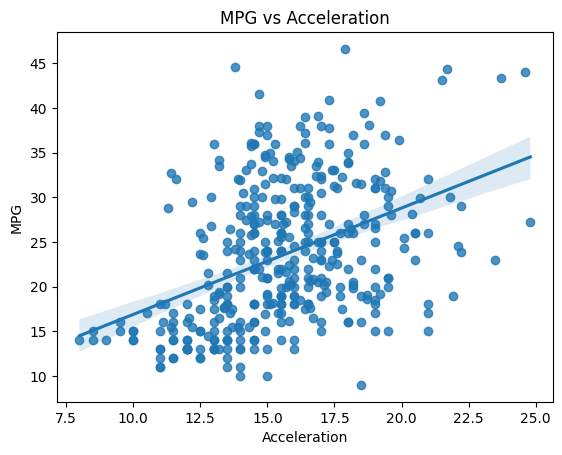

In [28]:
sns.regplot(data=mpg_data, x='acceleration', y='mpg')
plt.title('MPG vs Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.show()

**Insight** : Low accerelation(time for 0-60mph speedup) cars tend to have high mileage (mpg) but relationship is not strong

In [88]:
numerical_cols = mpg_data.select_dtypes(include=np.number)
numerical_cols.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000


<Axes: >

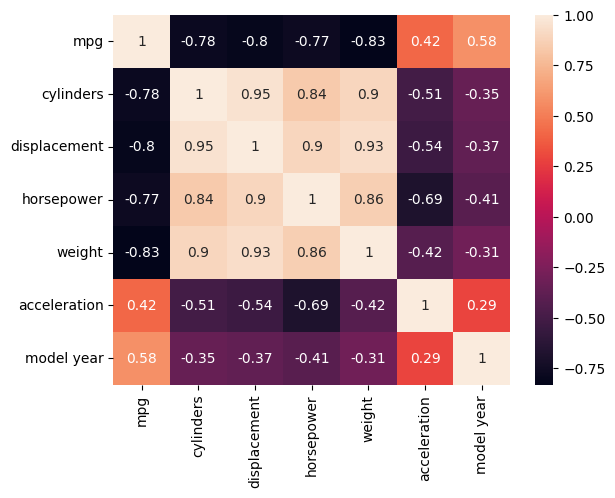

In [30]:
sns.heatmap(numerical_cols.corr(),
           annot=True)

**Insight** : Cylinders, displacement, horse power, weight are infleucing milegae (higher the weight less the mileage)

### 11. What relationships can be inferred between MPG, horsepower, and weight?


<Axes: >

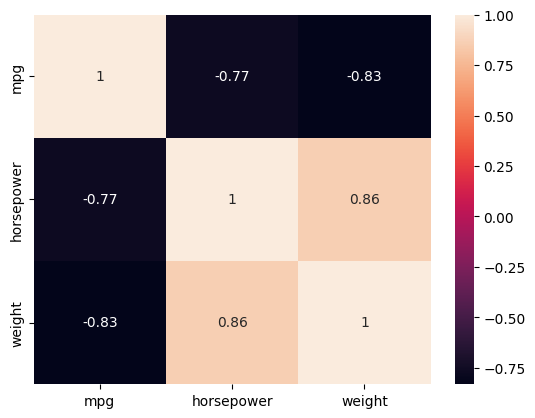

In [38]:
sns.heatmap(mpg_data[['mpg', 'horsepower', 'weight']].corr(),
           annot=True)

<Figure size 2000x2000 with 0 Axes>

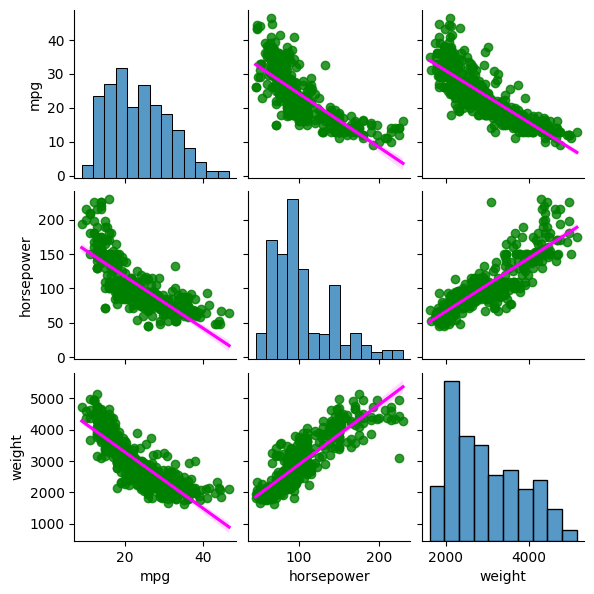

In [42]:
sns.pairplot(mpg_data[['mpg', 'horsepower', 'weight']], 
             diag_kind="hist",
             kind = "reg",
             plot_kws={"scatter_kws":{"color":"green"},
                        "line_kws" : {"color":"magenta"}
                      },
             height=2,
             aspect=1    # width = aspect * height
            )


### 12. How does the horsepower of cars vary by their origin?


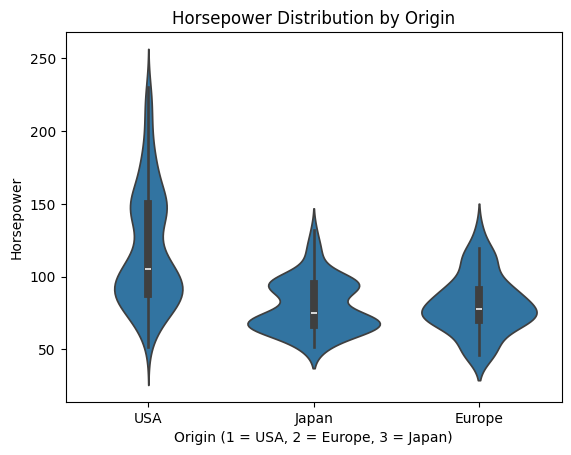

In [43]:
sns.violinplot(data=mpg_data, x='origin', y='horsepower')
plt.title('Horsepower Distribution by Origin')
plt.xlabel('Origin (1 = USA, 2 = Europe, 3 = Japan)')
plt.ylabel('Horsepower')
plt.show()

### 14. What is the distribution of engine displacement in the dataset?


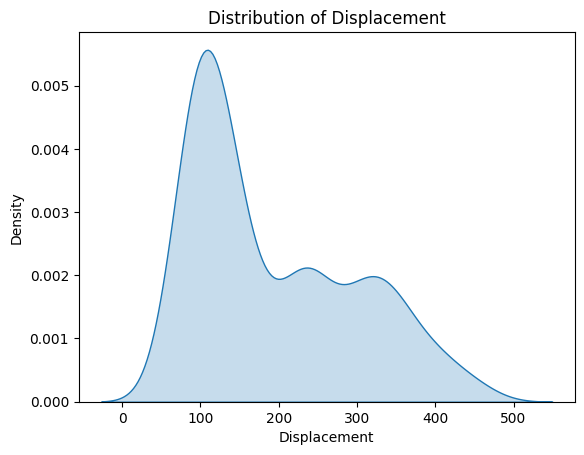

In [45]:
sns.kdeplot(data=mpg_data, x='displacement', fill=True)
plt.title('Distribution of Displacement')
plt.xlabel('Displacement')
plt.show()

### 15. How does MPG vary across different cylinders?


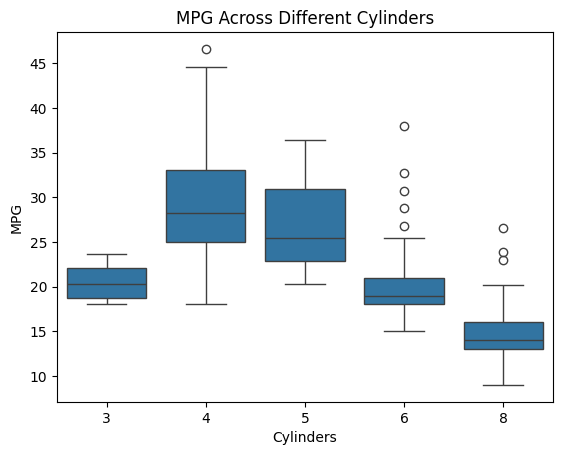

In [50]:
sns.boxplot(data=mpg_data, x='cylinders', y='mpg')
plt.title('MPG Across Different Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.show()

### 16. What is the distribution of MPG for different car origins?


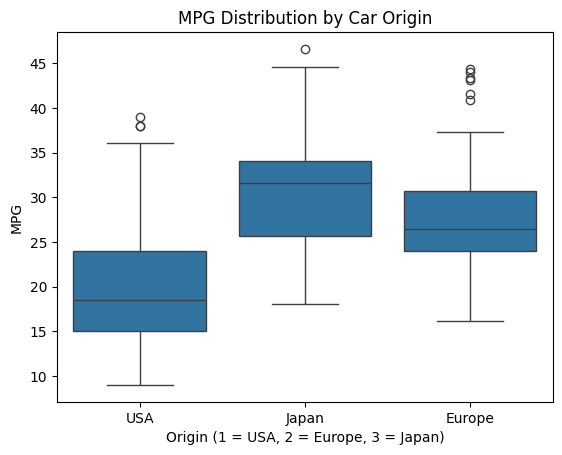

In [51]:
sns.boxplot(data=mpg_data, x='origin', y='mpg')
plt.title('MPG Distribution by Car Origin')
plt.xlabel('Origin (1 = USA, 2 = Europe, 3 = Japan)')
plt.ylabel('MPG')
plt.show()

<Axes: xlabel='origin', ylabel='horsepower'>

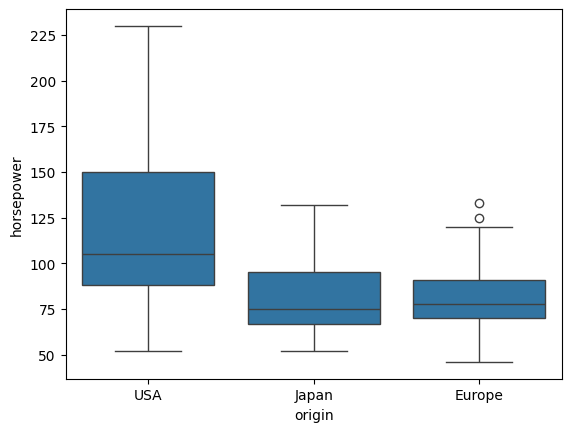

In [52]:
sns.boxplot(data=mpg_data, x='origin', y='horsepower')


In [53]:
mpg_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

### 17. How are different car features related?


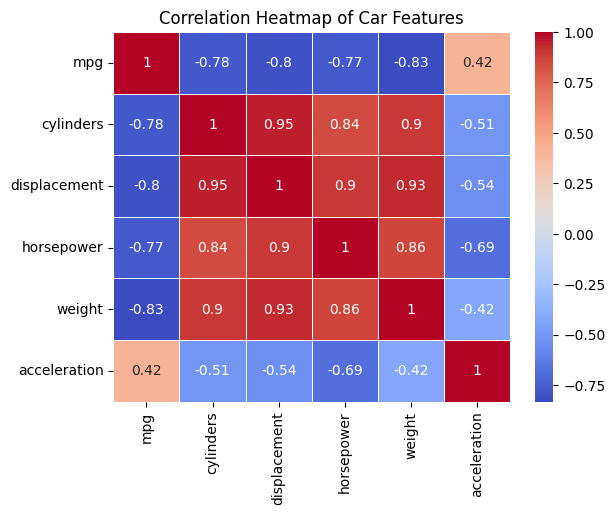

In [55]:
corr_matrix = mpg_data[['mpg', 'cylinders', 'displacement', 
                        'horsepower', 'weight','acceleration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Car Features')
plt.show()

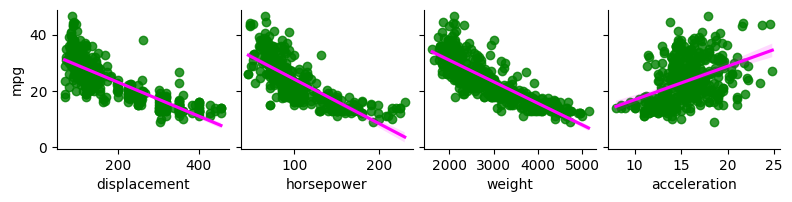

In [64]:
sns.pairplot(data = mpg_data,
             x_vars = ['displacement', 'horsepower', 'weight','acceleration'],
             y_vars='mpg',
             kind = "reg",
             plot_kws={ "scatter_kws":{"color":"green"},
                        "line_kws" : {"color":"magenta"} },
             height=2,
             aspect=1    # width = aspect * height 
             )


### 18. What is the distribution of acceleration among cars?


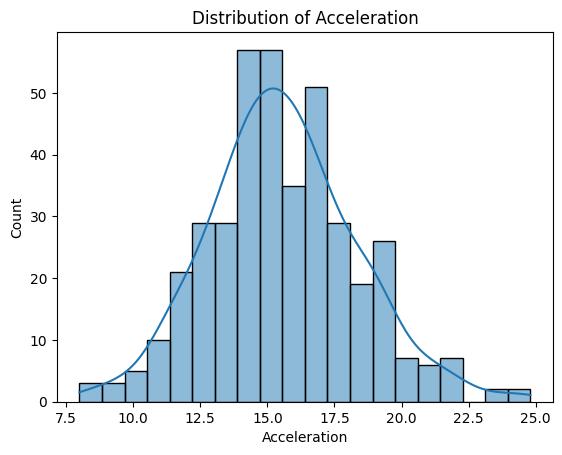

In [65]:
sns.histplot(data=mpg_data, x='acceleration', bins=20, kde=True)
plt.title('Distribution of Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('Count')
plt.show()

### 19. How does the weight of cars vary by their origin?


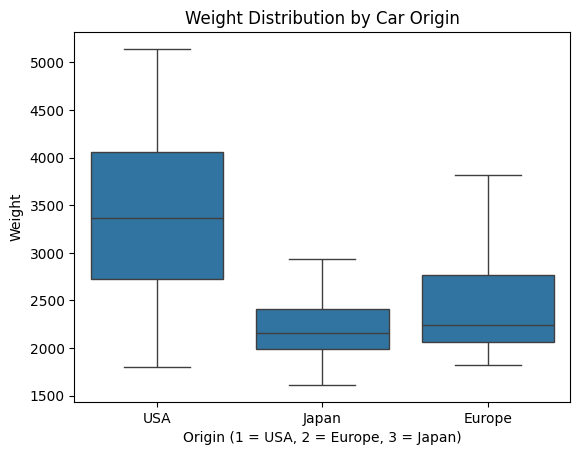

In [66]:
sns.boxplot(data=mpg_data, x='origin', y='weight')
plt.title('Weight Distribution by Car Origin')
plt.xlabel('Origin (1 = USA, 2 = Europe, 3 = Japan)')
plt.ylabel('Weight')
plt.show()

### 20. What is the relationship between MPG and horsepower?


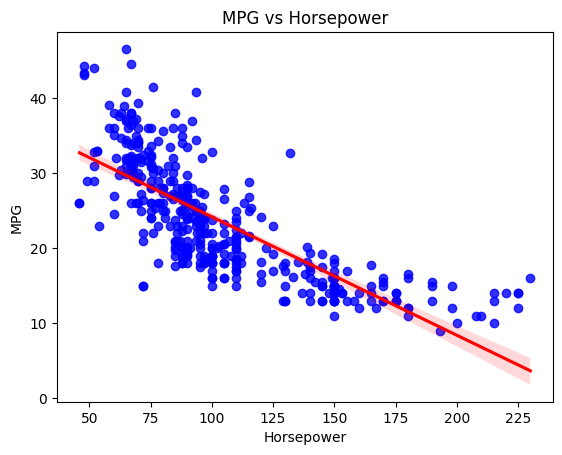

In [67]:
sns.regplot(data=mpg_data, x='horsepower', 
            y='mpg', 
            scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})
plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()